In [56]:
import numpy as np
import matplotlib.pyplot as plt

from classes.projectile import Projectile
from classes.constant import * 
from classes import trajectories as Trajectory

Vytvoření testovacího projektilu

In [57]:
projectile = Projectile("S&B FMJ 147grs", cal_inch=0.308, m_grs=147, G1=0.25, SD_inch=0.221) #G1=0.489

Vytvoření trajektorie projektilu pro rychlost 735 m/s

In [58]:
trajectory735 = Trajectory.trajectory(projectile,735)
compact735 = Trajectory.normTwoCols(Trajectory.compact(trajectory735,ran=900),(2,3))

In [59]:
Trajectory.printTable(compact735)

x: 100.0, y: -0.10762837534340494, v: 677.2477706304894
x: 200.0, y: -0.42001910409405774, v: 627.9132604770515
x: 300.0, y: -0.9640432818385013, v: 582.6451319965555
x: 400.0, y: -1.8206747920366924, v: 538.9410699565296
x: 500.0, y: -2.990542639219555, v: 499.4080608287237
x: 600.0, y: -4.58504536932468, v: 461.9660797828049
x: 700.0, y: -6.678125539323569, v: 426.92577894080523
x: 800.0, y: -9.23292029217464, v: 395.6319682473336
x: 900.0, y: -12.412390848151361, v: 366.55002864424137


Vytvoření trajektorie pro ten samý projektil, akorát pro rychlost 600 m/s

In [60]:
trajectory600 = Trajectory.trajectory(projectile,600)

Porovnání trajektorií při rychlostech 735 m/s a 600 m/s

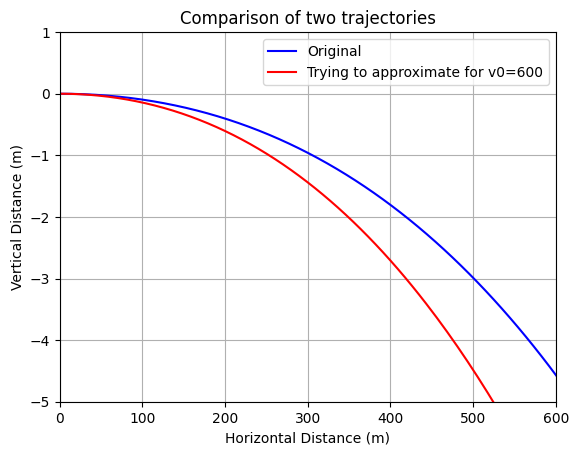

In [61]:
Trajectory.compare(trajectory735[:,0],trajectory735[:,1],trajectory600[:,0],trajectory600[:,1],x_limit=(0,600),y_limit=(1,-5),name1="Original",name2="Trying to approximate for v0=600")

Aproximace pro kompletní tabulky se všemi hodnotami
----------
Rozšíření matice trajektorie "735"(m/s) o časový vektor a následné normování rychlosti

In [62]:
trajectory735WithTime = Trajectory.addTimeToSolutionMatrix(trajectory735)
trajectory735WithTime = Trajectory.normTwoCols(trajectory735WithTime,(2,3))

In [63]:
Trajectory.printTable(trajectory735WithTime,("x","y","v","t"))

x: 0.0, y: 0.0, v: 735.0, t: 0.0
x: 7.336522471848207, y: -0.0004905548902424226, v: 730.8450453472148, t: 0.01001001001001001
x: 14.631688182088068, y: -0.00195854163928386, v: 726.7368157602491, t: 0.02002002002002002
x: 21.885960793719004, y: -0.0043985121103614425, v: 722.6745278173375, t: 0.03003003003003003
x: 29.09979620481043, y: -0.0078051093970313, v: 718.6574155324236, t: 0.04004004004004004
x: 36.27364272970421, y: -0.012173065694075901, v: 714.6847298622414, t: 0.050050050050050046
x: 43.40794126762851, y: -0.017497200316197684, v: 710.7557382368822, t: 0.06006006006006006
x: 50.50312546539499, y: -0.023772417786271042, v: 706.8697241091461, t: 0.07007007007007007
x: 57.55962186988516, y: -0.03099370604355563, v: 703.0259865377623, t: 0.08008008008008008
x: 64.57785008386368, y: -0.03915613461282837, v: 699.22383975962, t: 0.09009009009009009
x: 71.55822293252511, y: -0.048254852647272875, v: 695.462612726363, t: 0.10010010010010009
x: 78.50114661115794, y: -0.058285087193

Vytvoření polynomu $p$ aproximující průběh rychlosti v čase

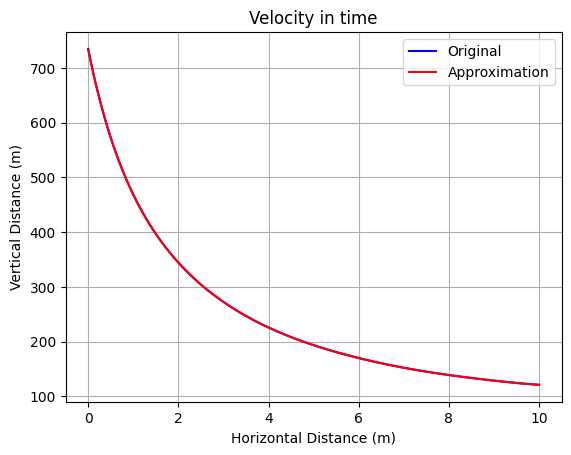

In [64]:
p = Trajectory.approximateCustom(trajectory735WithTime, 3,2, 8)

x = Trajectory.tLinspace()
Trajectory.compare(trajectory735WithTime[:,3],trajectory735WithTime[:,2],x,p(x),'Velocity in time',name1='Original',name2='Approximation')


Derivací polynomu $p$ získáme aproximaci zrychlení ze kterého lze vypočítat průběh odporové síly v závislosti na rychlosti

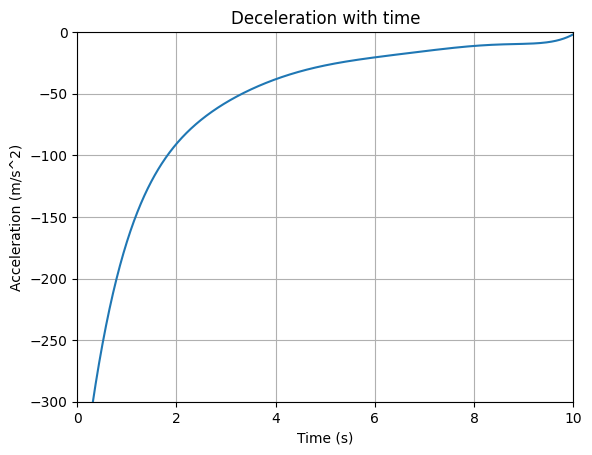

In [65]:
pdt = p.deriv()
Trajectory.plot(x,pdt(x),'Deceleration with time','Time (s)','Acceleration (m/s^2)',x_limit=(0,10),y_limit=(0,-300))

Výpočet síly vynásobením zrychlení hmotností projektilu (kg)

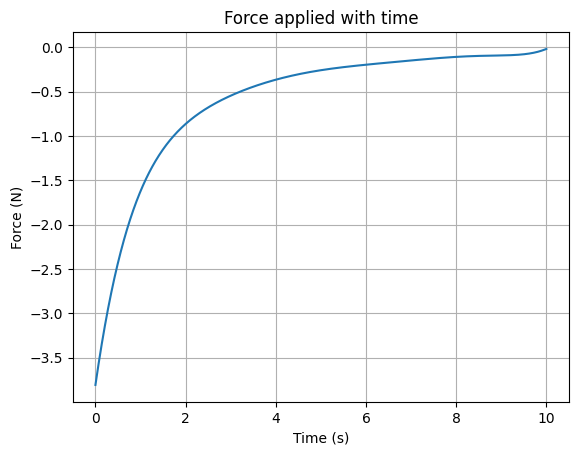

In [66]:
Trajectory.plot(x,pdt(x)*projectile.m_kg,'Force applied with time','Time (s)','Force (N)')
VelocityForceMatrix = np.zeros(shape=(len(x),2))
VelocityForceMatrix[:,0] = p(x)
VelocityForceMatrix[:,1] = pdt(x)*projectile.m_kg

Znázornění tabulky závislosti odporové síly na rychlosti

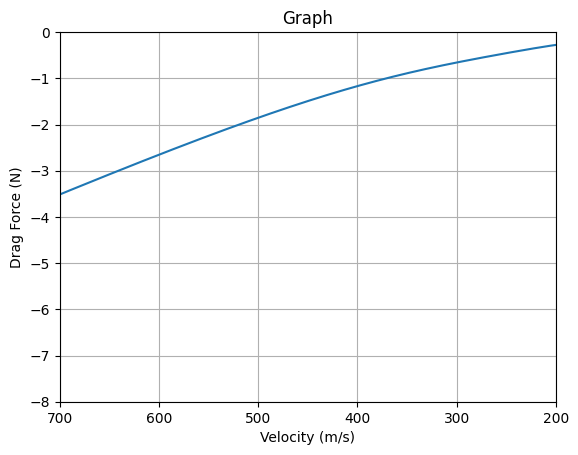

In [67]:
Trajectory.plot(VelocityForceMatrix[:,0],VelocityForceMatrix[:,1],x_limit=(700,200),y_limit=(0,-8),x_label="Velocity (m/s)",y_label="Drag Force (N)")

Aproximace funkce odporové síly
--------

Aproximace polynomem $F(v) = p'(v) \cdot m_{kg}$

Efektivnější řešení v případě aproximace funkce namísto užití pouze tabulky známých hodnot:

In [68]:
dragFunction = Trajectory.createDragFunction(trajectory735WithTime[:,2:], projectile=projectile,deg=4)

Znázornění polynomu

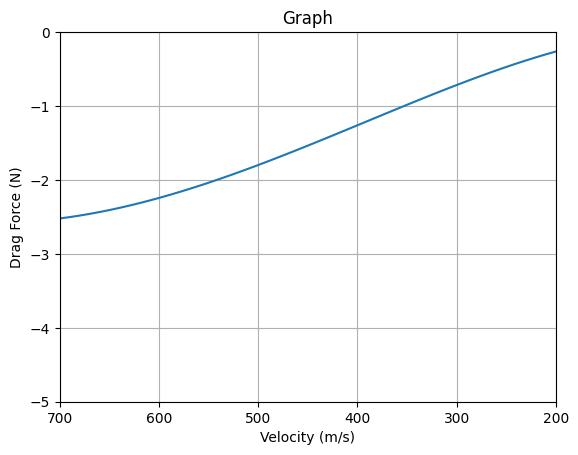

In [69]:
x = np.linspace(700,200)
Trajectory.plot(x,dragFunction(x),x_limit=(700,200),y_limit=(0,-5),x_label="Velocity (m/s)",y_label="Drag Force (N)")


---------
Vytvoření trajektorie pro testovací projektil o rychlosti 600 m/s pomocí matice závislosti odporu na rychlosti

In [70]:
app735to600 = Trajectory.trajectory(projectile,dragSource=VelocityForceMatrix,v=600)
app735to600 = Trajectory.normTwoCols(app735to600,(2,3))

Porovnání trajektorie 735m/s a 600 m/s

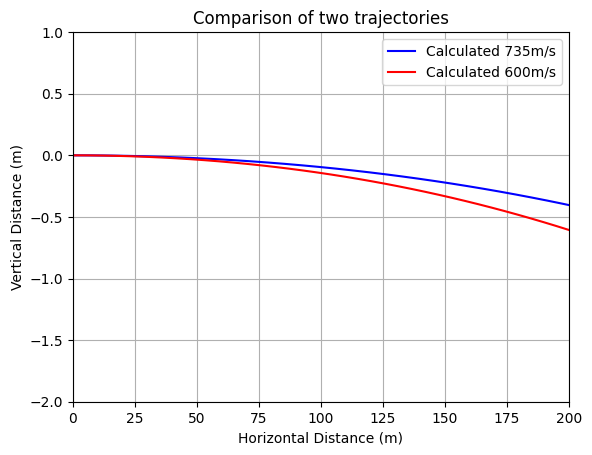

In [71]:
comparison = Trajectory.trajectory(projectile,600)

Trajectory.compare(trajectory735[:,0],trajectory735[:,1],comparison[:,0],comparison[:,1],x_limit=(0,200),y_limit=(1,-2),name1="Calculated 735m/s",name2="Calculated 600m/s")

Výpočet s odporovou maticí
---

Porovnání vypočtené trajektorie pro 600 m/s oproti trajektorie vypočtené s pomocí matice odporu odvozeného z trajektorie pro 735 m/s

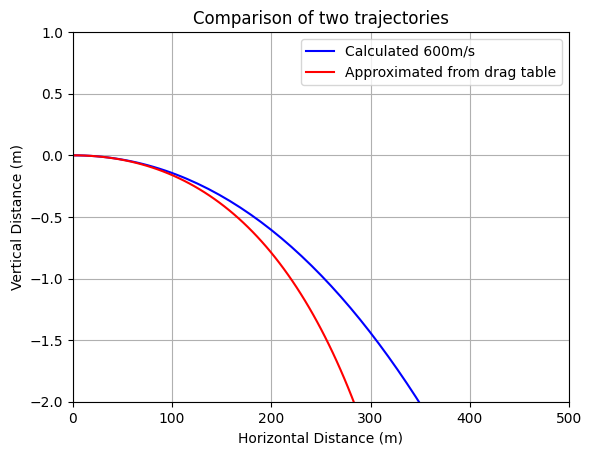

In [72]:
Trajectory.compare(comparison[:,0],comparison[:,1],app735to600[:,0],app735to600[:,1],x_limit=(0,500),y_limit=(1,-2),name1="Calculated 600m/s",name2="Approximated from drag table")

Výchylka při 300 m:

In [73]:
distance = 300
diff600 = Trajectory.getValues(comparison,distance)[0]
diff_app600 = Trajectory.getValues(app735to600,distance)[0]
print(f"Calculated y of 735 at {distance}m: {diff600}")
print(f"Calculated y of 600 at {distance}m: {diff_app600}")
print(f"Difference of impact: {(diff600-diff_app600)*100} cm")

Calculated y of 735 at 300m: -1.4791072145056925
Calculated y of 600 at 300m: -2.4402782407212578
Difference of impact: 96.11710262155653 cm


Výpočet s odporovou funkcí
---

Porovnání vypočtené trajektorie pro 600 m/s oproti trajektorii vypočtené s pomocí odporové funkce odvozené z trajektorie pro 735 m/s

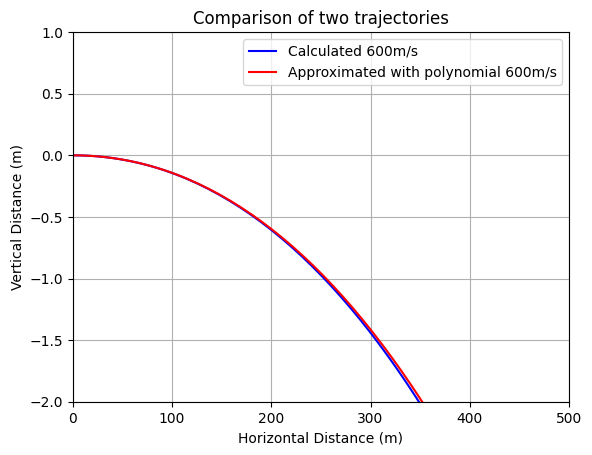

In [74]:
app735to600with_polynomial = Trajectory.trajectory(projectile, dragSource=dragFunction, v=600) 

Trajectory.compare(trajectory600[:,0],trajectory600[:,1],app735to600with_polynomial[:,0],app735to600with_polynomial[:,1],x_limit=(0,500),y_limit=(1,-2),name1="Calculated 600m/s",name2="Approximated with polynomial 600m/s")


Výchylka při 300 m:

In [75]:
distance = 300

diff600 = Trajectory.getValues(trajectory600,distance)[0]
diff600_force_poly = Trajectory.getValues(app735to600with_polynomial,distance)[0]
print(f"Calculated y of 735 at {distance}m: {diff600}")
print(f"Calculated y of 600 at {distance}m: {diff600_force_poly}")
print(f"Difference of impact: {(diff600-diff600_force_poly)*100} cm")

Calculated y of 735 at 300m: -1.4791072145056925
Calculated y of 600 at 300m: -1.4359096316593407
Difference of impact: -4.319758284635178 cm
